# Text Analytics HW3
Billy Yuan, Nikita Lakhotia, Stuti Madaan, Tyler Nicholas, Wenduo Wang

**The code is below the markdown file.**

If necessary, please download any missing files required from [here][linkgithub]. For the files required to run SentiStrength on Python, please visit their website.


[linkgithub]:https://github.com/billy-yuan/MSBA/tree/master/Fall%202016/Text%20Analytics/HW3

## Question 1

##### Create a directed product comparison network

The Product Comparison Network using unweighted PageRanks is below.

![alt text][q1]

[q1]:https://github.com/billy-yuan/MSBA/blob/master/Fall%202016/Text%20Analytics/HW3/Product%20Comparison%20Network.png?raw=true

## Question 2

##### Calculate both unweighted and weighted PageRank scores for each car.

```
Unweighted 

 ('LS', 0.165),
 ('Sclass', 0.127),
 ('7series', 0.122),
 ('A8', 0.097),
 ('5series', 0.096),
 ('ES', 0.096),
 ('XJ', 0.084),
 ('3series', 0.079),
 ('RX', 0.077),
 ('A6', 0.059)

Weighted

 ('LS', 0.258),
 ('Sclass', 0.205),
 ('A8', 0.133),
 ('7series', 0.111),
 ('ES', 0.079),
 ('XJ', 0.045),
 ('RX', 0.043),
 ('A6', 0.043),
 ('3series', 0.042),
 ('5series', 0.041)
 
```

##### What are the correlations between these metrics and sales figures shown below?

* The correlation between quantity sold and the unweighted PageRank is ```-0.323```.

* The correlation between quantity sold and the weighted PageRank is ```-0.392```.

The correlation between quantity sold and the unweighted PageRank is lower in magnitude compared to that between quantity sold and weighted PageRank. 

Both correlations were surprisingly negative; that is, the higher the PageRank score of a product, the lower the quantity of cars sold. One possible explanation is that if we use PageRank as a proxy for how much a customer prefers a product, then the most "preferred" cars such as the LS and S-Class are also the most expensive, and the number of the expensive cars sold are lower than more affordable vehicles. Therefore, the most preferred cars may also be the most expensive, and the quantity of expensive cars sold are lower, which explains why the correlations are negative.

If price point had been an extra variable, then the correlation numbers may increase. Below is a plot that shows the relationship between PageRank score and quantity sold. The cars in green are cars that we consider "luxury" and those in red are "budget."

![alt text][link3]

[link3]:https://github.com/billy-yuan/MSBA/blob/master/Fall%202016/Text%20Analytics/HW3/Weighted%20Pagerank%20Supervised%20Correlation.png?raw=true


Although it only contains 4 points, the relationship among the points in green (i.e. the luxury cars) is clearly linear (and positive!), suggesting that the correlation would be higher if we had held price point constant. In addition, if price point were taken into account, then a higher PageRank would correlate positively with quantity sold. Although the classes "luxury" and "budget" may be misleading, they nonetheless illustrate the effect that confounding variables may have on linear relationships.

##### What additional information do weighted PageRanks capture?

The weighted PageRanks capture the quantity of comparisons between two products. This information is important because if the LS and S-Class are compared more often than the LS and 5-Series, then the relationship between LS and S-Class should be more meaningful than that between the LS and 5-Series. The extra information captured from using weighted PageRank manifests itself in the higher magnitude of the weighted PageRank correlation with quantity of cars sold.
___

## Question 3

##### Generate sentiment scores with your script(s)

The first 20 lines of scores are below. The table contains many zeros; we will discuss why below.


In [160]:
senti_score_unsup[:20]

,3series,5series,7series,A6,A8,ES,LS,RX,Sclass,XJ
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,-3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,-1,0,0,0,0,0,-1,-1,-1,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,2,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0


##### Find weighted PageRank of each of the 10 cars
```
 ('7series', 0.198),
 ('5series', 0.151),
 ('Sclass', 0.11),
 ('A8', 0.102),
 ('RX', 0.097),
 ('LS', 0.097),
 ('XJ', 0.095),
 ('A6', 0.082),
 ('3series', 0.068)
```

##### Calculation the correlation with the sales figures above.

The correlation between the weighted PageRank (unsupervised) and the quantity sold is ``` -0.507```.

Below is a chart showing the relationship between PageRank and quantity sold.


![alt text][link1]

[link1]: https://github.com/billy-yuan/MSBA/blob/master/Fall%202016/Text%20Analytics/HW3/Unweighted%20Pagerank%20Correlation%202.png?raw=true"T"

##### How does the correlation of this automated approach compare with that of manual scoring in task B?

Our correlation surprisingly improved. This result could have been due to sampling; after all, we are calculating the correlation among only 10 different products so it is difficult to say whether our approach would scale up if more products were added. However, the heuristics we've chosen (described below) may have also allowed our PageRank calculations to be more conservative in predicting sentiment scores. As a result, our model labeled many sentences as having no sentiment, and only assigned a sentiment score if the sentence clearly expressed a product preference. This may have been useful in ambiguous uses of the English language such as sarcasm; in these cases, our algorithm predicted a sentiment score of 0.

Our approach to assigning sentiments to the products was similar to the approach used in the _Thumbs Up, Thumbs Down_ article. 

```
1. For each review:
    2. Split the review into sentences.
    
    3. For each sentence:
        4. Tokenize and lemmatize the sentence, and remove stop words.
        
        5. For each product:
            6. If the product is mentioned in the sentence, run SentiStrength to capture sentiment.
            7. Add this sentiment score to the existing sentiment score.
            
    8. After all the sentences are analyzed, the net sentiment scores for each product are stored.
    9. Repeat for all reviews.
```

We used several heuristics in order to simplify the problem:

**The sentiment of the sentence is the sentiment of the product.** 

Although there are cases where a user may be sarcastic, we assumed that the sentiment of the sentence represented their opinion of a product.

**If multiple products were mentioned in a single sentence, they were each assigned the same sentiment score.** 

We chose not to use proximity-based guesses (i.e. we did not assume that the sentiment of a product is closer to the product. If we had chosen this approach, assuming that we would have chosen the correct product 50% of the time and that the mistakes were randomly distributed among all cars, the expected value of our errors may have been minimized after 400 reviews or so. Of course, we would have preferred to use an algorithm that's able to correctly assign sentiment when multiple products are mentioned in a sentence.

**Sentences with sentiment scores of 0 that contained a product meant that the user was indifferent about the product.**

We relaxed many of the nuances in the English language. Some sentences in the review had a sentiment score of 0 but may have actually demonstrated slight preference. In these situations, we assumed that the user showed no preference. As discussed above, if we had tried to built an algorithm that attempted to explain all the nuances of the English language, our algorithm would have made more mistakes in assigning sentiment scores because of how complex this task is. In these cases, predicting a sentiment score of 0 was safer.

##### Algorithm Evaluation

Where did the algorithm do well and where did it make errors?

In general, if the sentence contained one product, and had a very clear emotion, then the SentiStrength scores accurately reflected the sentiment of a product. Consider the sentence from review 4:

```
The success of the LexusES does prove that, at least in the US market, the LexusES is unbeatable
Score (positive to negative): 3-1
```

However, in many cases, whenever a user mentioned a product, he or she didn't specify a clear opinion. Consider the following sentence from review 78:

```
Are the numbers similar for the Audi A8 vs A8L?
Score (positive to negative): 1-1
```

Because we did not look at adjectives near the sentence, the sentiment score of the sentence, and therefore the A8, is zero. It is unclear whether looking at nearby adjectives would have even helped. The next sentence of the review is:

```
Thanks to all of you for helping me see the light.
Score: 2-1
```

Does the positive sentiment reflect how the user feels about the A8 or the A8L? Creating an algorithm that also used proximity of adjectives to help explain sentiment would have been very difficult and may not have helped in this situation. 

##### Areas to Improve

Creating a more thorough and smarter algorithm to assign sentiments to products would be a top priority. Because of the heuristics used, our sentiment table contains many zeros, which may inflate the opinions of the most vocal and passionate customers. However, exploring the relationship between PageRank and quantity of cars sold was thought-provoking, and we are optimistic that the accuracy of such unsupervised learning will only improve with time.
___


### Python code

In [ ]:
from collections import Counter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pylab as py
from matplotlib.legend_handler import HandlerLine2D

from nltk import pos_tag, word_tokenize, classify, bigrams, trigrams
from nltk.corpus import stopwords as stpwds
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

import networkx as nx

lmtz = WordNetLemmatizer().lemmatize
stopwords = stpwds.words('english')
regex_token = RegexpTokenizer("[\w]+")


In [161]:
# Sentistrength on Python
# You may have to go on the SentiStrength site to download the SentiStrengthCom.jar and Sentstrength_Data folder.

import shlex, subprocess

def RateSentiment(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar /Users/billyyuan/Downloads/SentiStrengthCom.jar stdin sentidata \
                                     /Users/billyyuan/Downloads/Sentstrength_Data_Sept2011/ "),
                         stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    stdout_text, stderr_text = p.communicate(sentiString.replace(" ","+"))
    #remove the tab spacing between the positive and negative ratings. e.g. 1    -5 -> 1-5
    stdout_text = stdout_text.rstrip().replace("\t","")
    return stdout_text

# Sentiment scores
senti_data = pd.read_csv("Assignment 3 Sentiment Scores.csv")

# Reviews
rev = open("Assignment 3 Edmunds Posts.csv")
reviews_list = []
for line in rev:
    reviews_list.append(line)

#### Question 1 

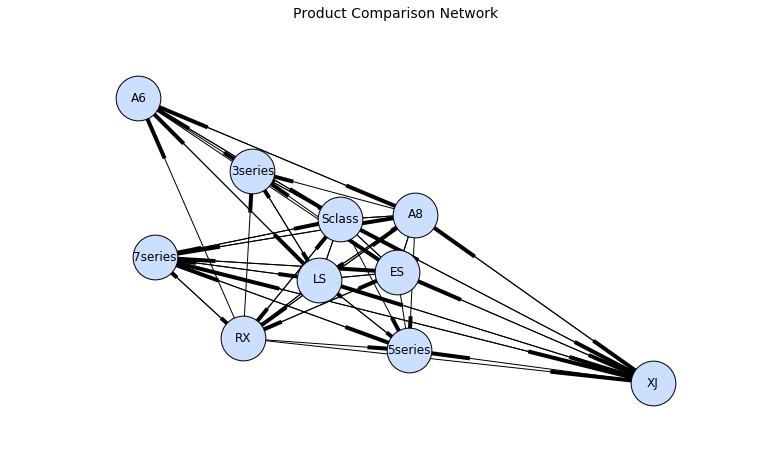

In [159]:
G = nx.DiGraph()
for i in range(len(senti_data)):
    for x in senti_data.columns.values:
        if senti_data.ix[i][x] > 0:
            for y in senti_data.columns.values:
                if senti_data.ix[i][y] > 0:
                    if senti_data.ix[i][x] > senti_data.ix[i][y]:
                        if (x,y) not in G.edges():
                            G.add_edges_from([(x,y)])

# Create plot

plt.figure(figsize=(10,6))

pos=nx.spring_layout(G)
nx.draw(G,pos,node_color = [204/255., 223/255., 255/255.], node_size=2000)
node_labels = {node:node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Product Comparison Network", fontsize=14)

# py.savefig('Product Comparison Network.png', bbox_inches='tight')



In [ ]:
# Sentistrength on Python

import shlex, subprocess

def RateSentiment(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar /Users/billyyuan/Downloads/SentiStrengthCom.jar stdin sentidata \
                                     /Users/billyyuan/Downloads/Sentstrength_Data_Sept2011/ "),
                         stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    stdout_text, stderr_text = p.communicate(sentiString.replace(" ","+"))
    #remove the tab spacing between the positive and negative ratings. e.g. 1    -5 -> 1-5
    stdout_text = stdout_text.rstrip().replace("\t","")
    return stdout_text

___

#### Question 2 

In [27]:
# Unweighted Pagerank
unweighted_pr_2 = [(key, round(nx.pagerank(G)[key],3)) for key in nx.pagerank(G)]
sorted(unweighted_pr_2, key=lambda tup:tup[1], reverse=True)

[('LS', 0.165),
 ('Sclass', 0.127),
 ('7series', 0.122),
 ('A8', 0.097),
 ('5series', 0.096),
 ('ES', 0.096),
 ('XJ', 0.084),
 ('3series', 0.079),
 ('RX', 0.077),
 ('A6', 0.059)]

In [9]:
# Weighted Pagerank
W = nx.DiGraph()
W_list = []
for i in range(len(senti_data)):
    for x in senti_data.columns.values:
        if senti_data.ix[i][x] > 0:
            for y in senti_data.columns.values:
                if senti_data.ix[i][y] > 0:
                    if senti_data.ix[i][x] > senti_data.ix[i][y]:
                         W_list.append((x,y))
                            
import collections
counter=collections.Counter(W_list)
for item in W_list:
    W.add_weighted_edges_from([(item[0], item[1], counter[(item[0],item[1])])])

In [12]:
# Sorted Weighted Pagerank

nx.pagerank(W)
weighted_pr_2 = [(key, round(nx.pagerank(W)[key],3)) for key in nx.pagerank(W)]
sorted(weighted_pr_2, key=lambda tup:tup[1], reverse=True)

[('LS', 0.258),
 ('Sclass', 0.205),
 ('A8', 0.133),
 ('7series', 0.111),
 ('ES', 0.079),
 ('XJ', 0.045),
 ('RX', 0.043),
 ('A6', 0.043),
 ('3series', 0.042),
 ('5series', 0.041)]

In [128]:
# Correlation Calculation

import numpy
# print numpy.corrcoef(a,b)

sales = [20, 12, 220, 60, 14, 6.6, 135, 30, 120, 25]
unweighted_2 = [.0589, .0966, .0791, .0957, .1217, .0839, .0956,.1645, .0766, .1273]
weighted_2 = [.0427,.1326,.0424,.0409,.1115,.0448,.0794,.2578,.0432,.2049]

print "Unweighted: ",numpy.corrcoef(sales,unweighted_2)[0][1]
print "Weighted: ",numpy.corrcoef(sales,weighted_2)[0][1]

Unweighted:  -0.32251795224
Weighted:  -0.391767337889


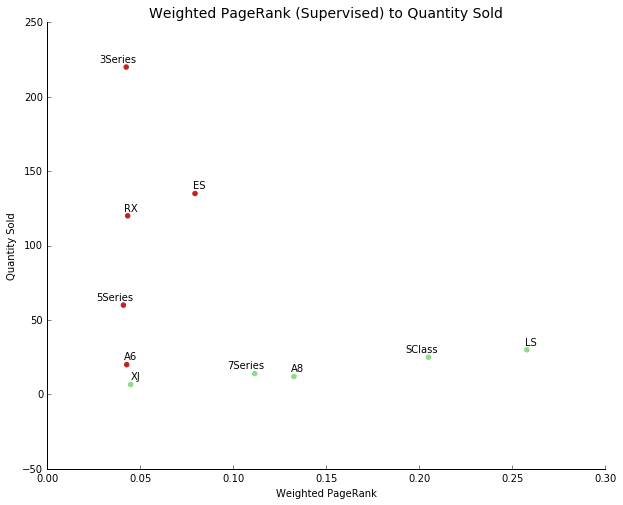

In [163]:
# Create plot between pagerank and quantity sold

cars = ['A6','A8','3Series','5Series','7Series','XJ','ES','LS','RX','SClass']
high = [141/255., 219/255., 135/255.]
low = [198/255., 31/255., 31/255.]

classes = [low,high,low,low,high,high,low,high,low,high]

plt.figure(figsize=(10,8))
plt.scatter(weighted_2, sales, color = classes)
plt.title("Weighted PageRank (Supervised) to Quantity Sold", fontsize=14)
plt.xlabel("Weighted PageRank")
plt.ylabel("Quantity Sold")

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

for X,Y,Z in zip(weighted_2,sales,cars):
    ax.annotate('{}'.format(Z),xy=(X,Y),xytext=(10,5), ha='right',textcoords='offset points')
    
py.savefig('Weighted Pagerank Supervised Correlation.png', bbox_inches='tight')

In [19]:
import re

# Make products list
products = list(senti_data.columns.values)

# Add common misspellings to products list and append later
products.append("LexusLS")

# Store sentiment counts here. This dict will be converted to a dataframe, which will feed into 
# Pagerank calculations. Each item of the list will correspond to a review (row), and each key
# will correspond to a product (column)
senti_dict = {}

for item in products:
    senti_dict[item] = []


for key in senti_dict:
    senti_dict[key] = [0] * len(reviews_list)

# Get sentiment scores of each product. The product's sentiment is equal to the sentiment of the sentence
# that contains the product. For example, if "LS" is in a sentence with sentiment of +3, then the product has a
# sentiment of +3. 

# i is the review index
i = 0
for review in reviews_list:
    sentences = []
    
# Break the review into sentences
    for line in re.split(r'[.]+',review):
        sentences.append(line)
    
# For each sentence, tokenize and lemmatize each word. Then, check if a product is in the sentence.
    for sentence in sentences:
        token_sent=[]
        token_sent = regex_token.tokenize(sentence)
        token_sent = [item.lower() for item in token_sent]
        token_no_stop = [lmtz(word) for word in token_sent if word not in stopwords]
        
# For each product, check if it's in the sentence. If it is, get the sentiment score
# of the sentence, and assign it to the product. The sentiment score of a product in a review
# is the sum of the sentiment scores of a product
        for word in products:
            if word.lower() in token_no_stop:
                score = re.split('-',RateSentiment(sentence))
                sent_score = int(score[0])-int(score[1])
                senti_dict[word][i] += sent_score
    i += 1

#### Question 3

In [127]:
senti_score_unsup = pd.DataFrame(senti_dict)
senti_score_unsup['LS'] += senti_score_unsup['LexusLS']
senti_score_unsup = senti_score_unsup.drop(['LexusLS'],axis=1)

senti_score_unsup[:10]

,3series,5series,7series,A6,A8,ES,LS,RX,Sclass,XJ
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,-3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,-1,0,0,0,0,0,-1,-1,-1,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,2,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0


In [22]:
# Unweighted
G3 = nx.DiGraph()
for i in range(len(senti_score_unsup)):
    for x in senti_score_unsup.columns.values:
        if senti_score_unsup.ix[i][x] > 0:
            for y in senti_score_unsup.columns.values:
                if senti_score_unsup.ix[i][y] > 0:
                    if senti_score_unsup.ix[i][x] > senti_score_unsup.ix[i][y]:
                        if (x,y) not in G3.edges():
                            G3.add_edges_from([(x,y)])

In [35]:
# Weighted

W3 = nx.DiGraph()
W3_list = []
for i in range(len(senti_score_unsup)):
    for x in senti_score_unsup.columns.values:
        if senti_score_unsup.ix[i][x] > 0:
            for y in senti_score_unsup.columns.values:
                if senti_score_unsup.ix[i][y] > 0:
                    if senti_score_unsup.ix[i][x] > senti_score_unsup.ix[i][y]:
                         W3_list.append((x,y))
                            
counter=collections.Counter(W3_list)
for item in W3_list:
    W3.add_weighted_edges_from([(item[0], item[1], counter[(item[0],item[1])])])
    
    
weighted_pr_3 = [(key, round(nx.pagerank(W3)[key],3)) for key in nx.pagerank(W3)]
sorted(weighted_pr_3, key=lambda x:x[1], reverse=True)

[('7series', 0.198),
 ('5series', 0.151),
 ('Sclass', 0.11),
 ('A8', 0.102),
 ('RX', 0.097),
 ('LS', 0.097),
 ('XJ', 0.095),
 ('A6', 0.082),
 ('3series', 0.068)]

In [78]:
weighted_3_corr= [.082,.102,.068,.151,.198,.095,0,.097,.097,.11]
cars = ['A6','A8','3Series','5Series','7Series','XJ','ES','LS','RX','SClass']
print "Weighted: ",numpy.corrcoef(sales,weighted_3_corr)[0][1]

Weighted:  -0.507073060525


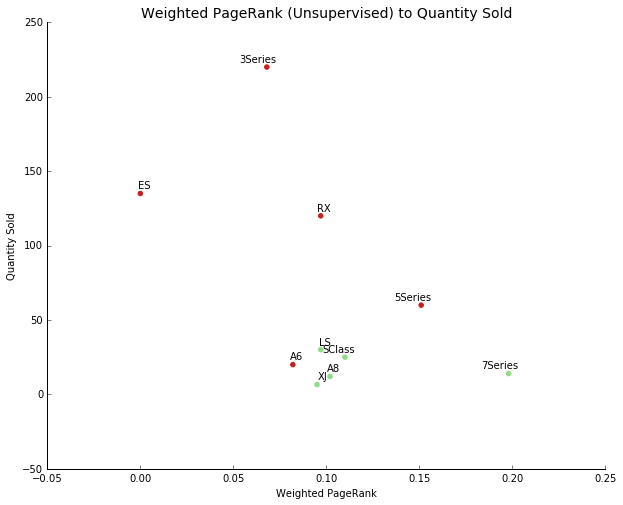

In [166]:
plt.figure(figsize=(10,8))
# plt.scatter(weighted_3_corr, sales, color = [242/255., 175/255., 116/255.])
plt.scatter(weighted_3_corr, sales, color = classes)
plt.title("Weighted PageRank (Unsupervised) to Quantity Sold", fontsize=14)
plt.xlabel("Weighted PageRank")
plt.ylabel("Quantity Sold")

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 


for X,Y,Z in zip(weighted_3_corr,sales,cars):
    ax.annotate('{}'.format(Z),xy=(X,Y),xytext=(10,5), ha='right',textcoords='offset points')
    
py.savefig('Unweighted Pagerank Correlation 2.png', bbox_inches='tight')

In [191]:
print re.split('[.]',reviews_list[4])
# print RateSentiment(re.split('[.]',reviews_list[80])[0])

['"The success of the LexusES does prove that, at least in the US market, the LexusES is unbeatable', ' In Europe though, its a completely unsellable car', ' Agree with the first part', '  Not sure about the second part', '  The RX is doing incredibly well in UK', '  Lexus has only just arrived in Europe as a brand identity distinct from Toyota, starting from UK', '"\r\n']
